# Convolutional neural networks (CNNs)

State-of-the-art image classification is performed with [convolutional neural networks](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNNs) that use [convolution layers](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/) to extract features from images and [pooling layers](https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/) to downsize images so features can be detected at various resolutions. Let's use Keras to build a CNN and train it to differentiate between photos containing hot dogs, pizza, and sushi. Note that CNNs perform best when trained with thousands (or tens or hundreds of thousands) of images. In this example, we will use 60 images for training and 30 for testing.

![](Images/cnn.png)

## Load training and testing images

The first step is to load the images that will be used for training and testing and to label the images with 0 for hot dogs, 1 for pizza, and 2 for sushi. We'll start by defining a function for loading images from the file system and affixing labels to them, and another function for displaying images. We will also define four Python lists to hold the images used for training and testing (`x_train` and `x_test`) and the labels used for training and testing (`y_train` and `y_test`).

In [1]:
import os
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(path + file, target_size=(224, 224, 3))) / 255)
        labels.append((label))
        
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])

x_train = []
y_train = []
x_test = []
y_test = []

Load hot-dog images for training and show the first few.

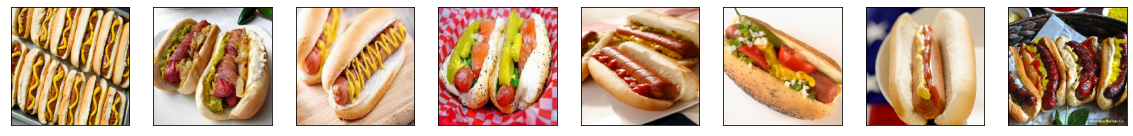

In [2]:
images, labels = load_images_from_path('food/train/hotdog/', 0)
show_images(images)
    
x_train += images
y_train += labels

Load pizza images for training and show the first few.

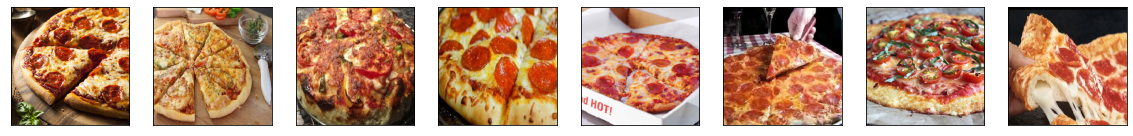

In [3]:
images, labels = load_images_from_path('food/train/pizza/', 1)
show_images(images)
    
x_train += images
y_train += labels

Load sushi images for training and show the first few.

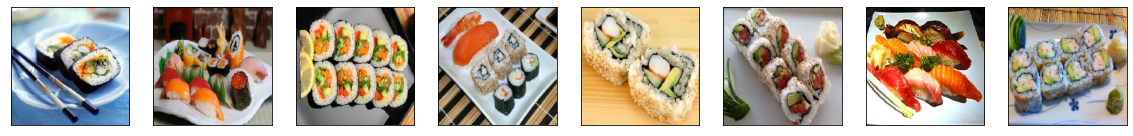

In [4]:
images, labels = load_images_from_path('food/train/sushi/', 2)
show_images(images)

x_train += images
y_train += labels

Load hot-dog images for testing and show the first few.

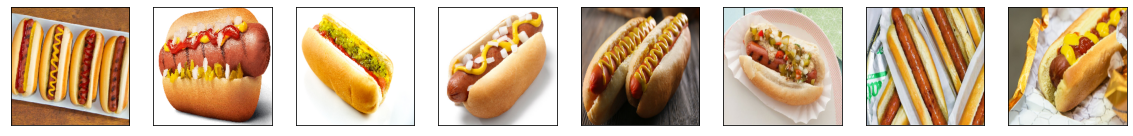

In [5]:
images, labels = load_images_from_path('food/test/hotdog/', 0)
show_images(images)
    
x_test += images
y_test += labels

Load pizza images for testing and show the first few.

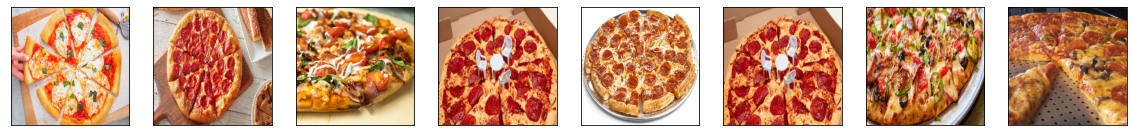

In [6]:
images, labels = load_images_from_path('food/test/pizza/', 1)
show_images(images)
    
x_test += images
y_test += labels

Load sushi images for testing and show the first few.

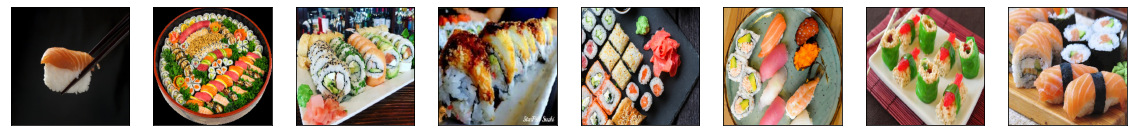

In [7]:
images, labels = load_images_from_path('food/test/sushi/', 2)
show_images(images)
    
x_test += images
y_test += labels

Convert the lists holding the training and testing images into NumPy arrays, and use Keras's [`to_categorical`](https://keras.io/api/utils/python_utils/#to_categorical-function) function to one-hot-encode the training and testing labels.

In [8]:
from keras.utils import to_categorical

x_train = np.array(x_train)
x_test = np.array(x_test)

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

## Build and train a CNN

Keras makes it easy to build and train CNNs using classes such as [Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/#conv2d-class) and [MaxPooling2D](https://keras.io/api/layers/pooling_layers/max_pooling2d/#maxpooling2d-class). Let's build a CNN with four convolutional layers, followed by a pair of fully connected layers for classification. We will use a dropout of 20% to help the CNN generalize better.

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 128)     36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

Train the model by calling [`fit`](https://keras.io/api/models/model_training_apis/#fit-method).

In [10]:
hist = model.fit(x_train, y_train_encoded, validation_data=(x_test, y_test_encoded), batch_size=10, epochs=20)

Epoch 1/20
6/6 [==============================] - 2s 258ms/step - loss: 1.4867 - accuracy: 0.3000 - val_loss: 1.1124 - val_accuracy: 0.3333
Epoch 2/20
6/6 [==============================] - 1s 235ms/step - loss: 1.1588 - accuracy: 0.3167 - val_loss: 1.0999 - val_accuracy: 0.3333
Epoch 3/20
6/6 [==============================] - 1s 235ms/step - loss: 1.1231 - accuracy: 0.3333 - val_loss: 1.0962 - val_accuracy: 0.3333
Epoch 4/20
6/6 [==============================] - 1s 239ms/step - loss: 1.0974 - accuracy: 0.3500 - val_loss: 1.0932 - val_accuracy: 0.3333
Epoch 5/20
6/6 [==============================] - 1s 240ms/step - loss: 1.0821 - accuracy: 0.3667 - val_loss: 1.0564 - val_accuracy: 0.3333
Epoch 6/20
6/6 [==============================] - 1s 242ms/step - loss: 1.0025 - accuracy: 0.5333 - val_loss: 0.9330 - val_accuracy: 0.6667
Epoch 7/20
6/6 [==============================] - 1s 249ms/step - loss: 0.7485 - accuracy: 0.6667 - val_loss: 0.6840 - val_accuracy: 0.6000
Epoch 8/20
6/6 [====

How well did the CNN train? Let's plot the training accuracy and validation accuracy for each epoch.

[]

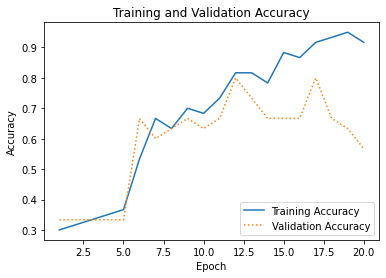

In [11]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

The validation accuracy is decent, but it's not state-of-the art. Modern CNNs often achieve an accuracy of 95% or more doing image classification. You could increase the accuracy by deepening the network and increasing the number of training images by an order of magnitude or more, but training time would increase commensurately. One solution for that is to do the training on an HPC cluster outfitted with GPUs. A more practical solution is [transfer learning](https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a), which enables sophisticated image-classification networks to be trained on an ordinary CPU.